In [6]:
#Michael Owen ML Project - Data Analysis and Model testing using UCI SMSSpamCollection data set
#dataset found here: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import operator
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=['label','message'])

In [ ]:
df.shape
# 5,572 messages

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 4825 ham (non-spam) messages and 747 spam messages

In [179]:
df.groupby('label').count()

,message
label,
ham,4825
spam,747


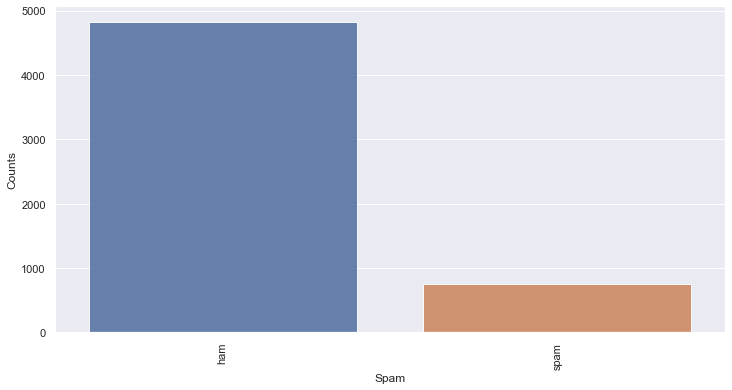

In [180]:
label_counts = df.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = label_counts.index, y = label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [181]:
spam = df[df['label']=='spam']

In [182]:
spam.head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [183]:
spam.describe()

,label,message
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


In [184]:
def generate_wc(dataframe):
    dataframe_words = ' '.join(list(dataframe['message']))
    dataframe_wc = WordCloud(width=1024,height=512).generate(dataframe_words)
    plt.figure(figsize=(12,6), facecolor='k')
    plt.imshow(dataframe_wc)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

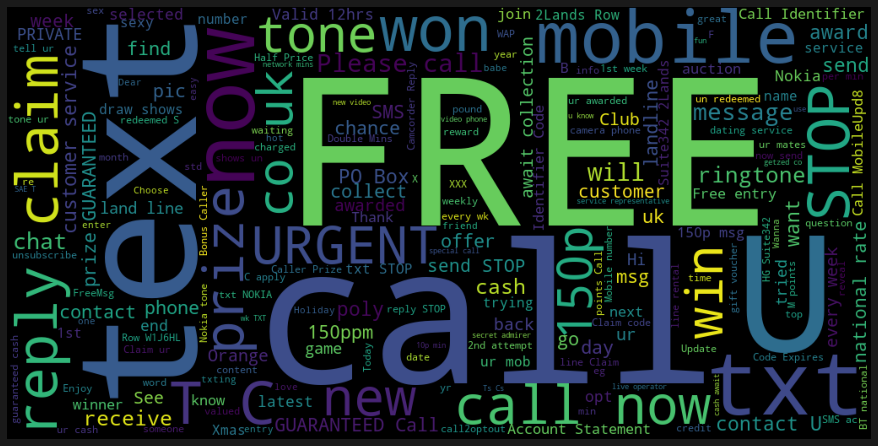

In [185]:
generate_wc(spam)

In [186]:
ham = df[df['label']=='ham']
ham.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [187]:
ham.describe()

,label,message
count,4825,4825
unique,1,4516
top,ham,"Sorry, I'll call later"
freq,4825,30


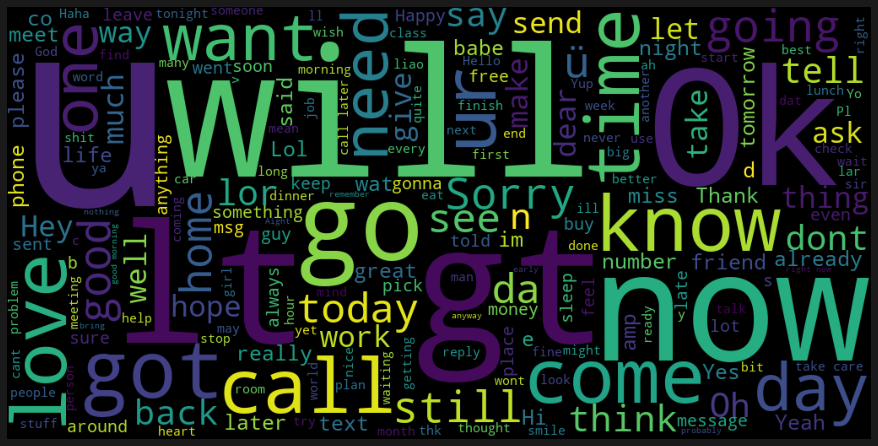

In [188]:
generate_wc(ham)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size=0.2, random_state=1)

In [190]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

### Sparse Matrix

In [191]:
print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>


### A look at some of the terms and tfidf values in a converted dense matrix

In [194]:
feature_names = vectorizer.get_feature_names()
tfid_df = pd.DataFrame(X_train.T.todense(), index=feature_names)
print(tfid_df[1200:1205])

           0     1     2         3     4     5     6     7     8     9     \
backdoor    0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
backwards   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
bad         0.0   0.0   0.0  0.193352   0.0   0.0   0.0   0.0   0.0   0.0   
badass      0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
badly       0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   

           ...  4447  4448  4449  4450  4451  4452  4453  4454  4455  4456  
backdoor   ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
backwards  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
bad        ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
badass     ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
badly      ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4457 columns]


# Now we will perform model testing and parameter tuning on a variety of classifiers: GaussianNB, MultinomialNB, KNN, SVM, Adaboost
## GaussianNB classifier with default parameters

In [208]:
clf = GaussianNB()
clf.fit(X_train.toarray(),y_train)

GaussianNB()

In [209]:
y_true, y_pred = y_test, clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.8986547085201794

In [210]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.89      0.94       968
        spam       0.57      0.93      0.71       147

    accuracy                           0.90      1115
   macro avg       0.78      0.91      0.82      1115
weighted avg       0.93      0.90      0.91      1115



In [211]:
cmtx = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])

In [212]:
print(cmtx)
#113 misclassifications on test set

      ham  spam
ham   866   102
spam   11   136


In [35]:
def plot_cf_mat(cf_mat):
    import pylab as pl
    %matplotlib inline
    pl.matshow(cf_mat)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.ylabel('Actual')
    pl.xlabel('Predicted')
    pl.show()

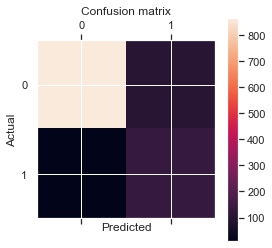

In [214]:
plot_cf_mat(cmtx)

## GaussianNB classifier using GridSearchCV to find best smoothing parameter

In [215]:
parameters = {"var_smoothing":[1e-9, 1e-5, 1e-1]}
gs_clf = GridSearchCV(GaussianNB(), parameters)
gs_clf.fit(X_train.toarray(),y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-05, 0.1]})

In [216]:
gs_clf.best_params_

{'var_smoothing': 0.1}

In [217]:
y_true, y_pred = y_test, gs_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9650224215246637

In [218]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       968
        spam       0.80      0.98      0.88       147

    accuracy                           0.97      1115
   macro avg       0.90      0.97      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [219]:
cmtx = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)
#39 misclassifications - 74 fewer misclassifications after using GSCV

      ham  spam
ham   932    36
spam    3   144


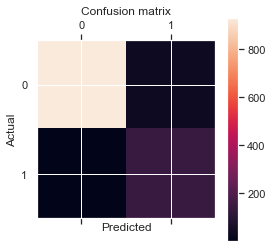

In [220]:
plot_cf_mat(cmtx)

## Getting predicted label on some example messages

In [221]:
message_example = vectorizer.transform(['call me later'])
message_example = message_example.toarray()

In [222]:
gs_clf.predict(message_example)

array(['ham'], dtype='<U4')

In [223]:
message_example2 = vectorizer.transform(['click link for prize'])
message_example2 = message_example2.toarray()

In [224]:
gs_clf.predict(message_example2)

array(['spam'], dtype='<U4')

## MultinomialNB classifer with default parameters

In [225]:
MN_clf = MultinomialNB()
MN_clf.fit(X_train.toarray(),y_train)

MultinomialNB()

In [226]:
y_true, y_pred = y_test, MN_clf.predict(X_test.toarray())

In [227]:
accuracy_score(y_true, y_pred)
#Default multinomialNB (without GridSearchCV) achieves equal accuracy to GaussianNB with GridSearchCV

0.9650224215246637

In [228]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       968
        spam       1.00      0.73      0.85       147

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [229]:
cmtx = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)

      ham  spam
ham   968     0
spam   39   108


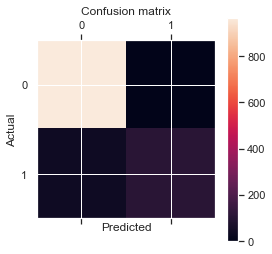

In [230]:
plot_cf_mat(cmtx)

## MultinomialNB classifer using GridSearchCV to find best alpha parameters

In [231]:
alphas = np.logspace(-7, 0, 10)

In [232]:
parameters = {"alpha": alphas}

In [233]:
MN_gs_clf = GridSearchCV(MultinomialNB(), parameters)
MN_gs_clf.fit(X_train.toarray(),y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e-07, 5.99484250e-07, 3.59381366e-06, 2.15443469e-05,
       1.29154967e-04, 7.74263683e-04, 4.64158883e-03, 2.78255940e-02,
       1.66810054e-01, 1.00000000e+00])})

In [234]:
MN_gs_clf.best_params_

{'alpha': 0.02782559402207126}

In [235]:
y_true, y_pred = y_test, MN_gs_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9928251121076234

In [236]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       968
        spam       1.00      0.95      0.97       147

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [237]:
cmtx = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])

In [238]:
print(cmtx)
#Only 8 misclassfied sms messages (8 predicted as ham but actually spam). 31 less misclassifications after GSCV

      ham  spam
ham   968     0
spam    8   139


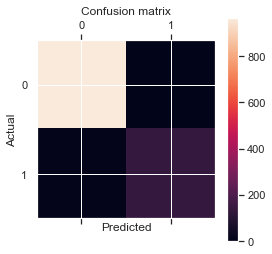

In [239]:
plot_cf_mat(cmtx)

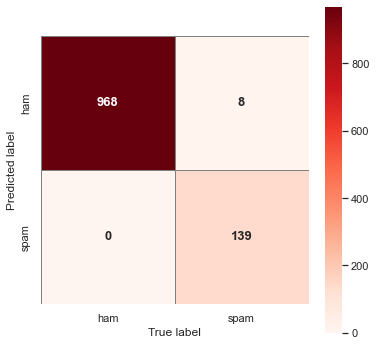

In [240]:
#import seaborn as sns; sns.set()

mat = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(mat.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":13, "weight":"bold"},
            xticklabels=["ham","spam"],
            yticklabels=["ham","spam"])

plt.xlabel('True label')
plt.ylabel('Predicted label');

## KNeighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_clf = KNeighborsClassifier()
# default distance metric => minkowski

In [44]:
knn_clf.fit(X_train.toarray(),y_train)

KNeighborsClassifier()

In [47]:
knnpreds_test = knn_clf.predict(X_test)

In [48]:
knn_clf.score(X_test,y_test)

0.9147982062780269

In [49]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       968
        spam       1.00      0.35      0.52       147

    accuracy                           0.91      1115
   macro avg       0.96      0.68      0.74      1115
weighted avg       0.92      0.91      0.90      1115



In [52]:
cmtx = pd.DataFrame(confusion_matrix(y_test, knnpreds_test, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)

      ham  spam
ham   968     0
spam   95    52


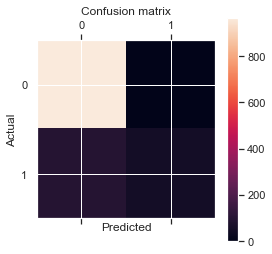

In [51]:
plot_cf_mat(cmtx)

## KNeighbors Classifier using GridSearchCV

In [37]:
parameters = {"n_neighbors": [i for i in range(2,9)], "metric":['euclidean','cosine']}

In [38]:
knn_gs_clf = GridSearchCV(KNeighborsClassifier(),parameters)
%time _ = knn_gs_clf.fit(X_train.toarray(),y_train)

Wall time: 51.7 s


In [39]:
knn_gs_clf.best_params_

{'metric': 'cosine', 'n_neighbors': 3}

In [40]:
y_true, y_pred = y_test, knn_gs_clf.predict(X_test.toarray())

In [41]:
accuracy_score(y_true, y_pred)

0.9820627802690582

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       0.99      0.87      0.93       147

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [54]:
cmtx = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)
#75 fewer misclassifications after using optimal parameters found by GridSearchCV

      ham  spam
ham   967     1
spam   19   128


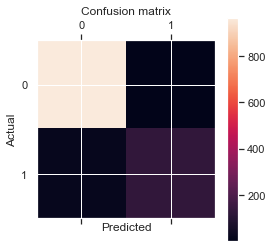

In [55]:
plot_cf_mat(cmtx)

## SVM using default SVC classifer parameters

In [58]:
from sklearn.svm import SVC

In [59]:
svm_clf = SVC()
svm_clf.fit(X_train.toarray(),y_train)
#default kernel = rbf (gaussian) and default C = 1

SVC()

In [60]:
y_true, y_pred = y_test, svm_clf.predict(X_test.toarray())

In [61]:
accuracy_score(y_true, y_pred)

0.9856502242152466

In [62]:
cmtx = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)

      ham  spam
ham   968     0
spam   16   131


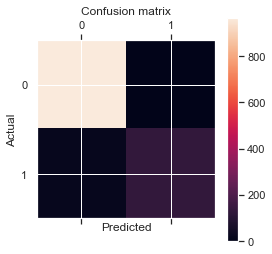

In [63]:
plot_cf_mat(cmtx)

## SVM using GridSearchCV on C parameter (limited parameter variations due to slow running time - quadratic time complexity)

In [65]:
parameters = {"kernel": ['rbf','linear'], "C": [0.5,1,5,10]}

In [66]:
SVM_gs_clf = GridSearchCV(SVC(), parameters)
%time _ = SVM_gs_clf.fit(X_train.toarray(),y_train)

Wall time: 21min 59s


In [69]:
SVM_gs_clf.best_params_

{'C': 5, 'kernel': 'linear'}

In [70]:
y_true, y_pred = y_test, SVM_gs_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9910313901345291

In [71]:
cmtx = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)

      ham  spam
ham   965     3
spam    7   140


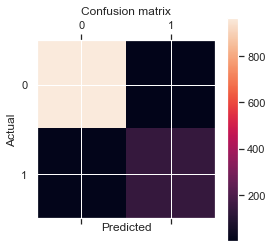

In [72]:
plot_cf_mat(cmtx)

## Ensamble classification via Adaboost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ab = AdaBoostClassifier()

In [67]:
ab.fit(X_train.toarray(),y_train)

AdaBoostClassifier()

In [69]:
y_true, y_pred = y_test, ab.predict(X_test.toarray())

In [70]:
accuracy_score(y_true, y_pred)

0.9739910313901345

In [71]:
cmtx = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=['ham', 'spam']), index=['ham', 'spam'], columns=['ham', 'spam'])
print(cmtx)

      ham  spam
ham   959     9
spam   20   127


## Adaboost using GridSearchCV

In [73]:
ab_gs_clf = AdaBoostClassifier()

In [74]:
parameters = {
    'learning_rate': [0.8, 1.0, 1.3],
    'n_estimators': [20,40,60],
}

In [75]:
gs = GridSearchCV(ab_gs_clf, parameters, cv=3)

In [76]:
%time _ = gs.fit(X_train.toarray(), y_train)

Wall time: 10min 38s


In [77]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.8, 'n_estimators': 60}, 0.9730756042555054)

In [79]:
y_true, y_pred = y_test, gs.predict(X_test.toarray())
accuracy_score(y_true, y_pred)
#the best parameter combination found is very close to the default parameters - hence accuracy is similar

0.9757847533632287

## Retesting some of these classifiers, but now after removing stopwords

In [146]:
import nltk

In [147]:
#nltk.download('stopwords')

In [148]:
from nltk.corpus import stopwords

In [149]:
stop_words = set(stopwords.words('english'))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size=0.2, random_state=1)

In [54]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## GaussianNB after stopword removal

In [238]:
clf_sw_GNB = GaussianNB()
clf_sw_GNB.fit(X_train.toarray(),y_train)

GaussianNB()

In [239]:
y_true, y_pred = y_test, clf_sw_GNB.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.8941704035874439

### ^ Decrease in accuracy from 89.86% to 89.417% after stopword removal

## MultinomialNB after removing stopwords

In [240]:
MN_sw_clf = MultinomialNB()
MN_sw_clf.fit(X_train.toarray(),y_train)

MultinomialNB()

In [241]:
y_true, y_pred = y_test, MN_sw_clf.predict(X_test.toarray())
accuracy_score(y_true, y_pred)

0.9766816143497757

### ^ Increase in accuracy from 96.50% to 97.66% after stopword removal

## SVC after removing stopwords

In [10]:
svm_sw_clf = SVC()
svm_sw_clf.fit(X_train.toarray(),y_train)

SVC()

In [11]:
y_true, y_pred = y_test, svm_sw_clf.predict(X_test.toarray())

In [12]:
accuracy_score(y_true, y_pred)

0.9847533632286996

### ^ Decrese in accuracy from 98.56% to 98.47% after stopword removal

### Now let's make use of sklearn's Pipeline using TfidfVectorizer and MultinomialNB, along with GridSearchCV. Here, stopwords will be removed in the pipeline so we can compare with the 99.28% accuracy achieved in the earlier MultinomialNB GridSearchCV example - where stopwords were not removed.

In [196]:
from sklearn.pipeline import Pipeline

In [197]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'],test_size=0.2, random_state=1)

In [36]:
parameters = {'nb__alpha': np.logspace(-7, 0, 10),
}

clf = Pipeline([('vect', TfidfVectorizer(stop_words=list(stop_words))),('nb', MultinomialNB()),])

gs = GridSearchCV(clf, parameters, verbose=2, cv=3)

In [37]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................................nb__alpha=1e-07; total time=   0.0s
[CV] END ....................................nb__alpha=1e-07; total time=   0.0s
[CV] END ....................................nb__alpha=1e-07; total time=   0.0s
[CV] END ....................nb__alpha=5.994842503189409e-07; total time=   0.0s
[CV] END ....................nb__alpha=5.994842503189409e-07; total time=   0.0s
[CV] END ....................nb__alpha=5.994842503189409e-07; total time=   0.0s
[CV] END ...................nb__alpha=3.5938136638046257e-06; total time=   0.0s
[CV] END ...................nb__alpha=3.5938136638046257e-06; total time=   0.0s
[CV] END ...................nb__alpha=3.5938136638046257e-06; total time=   0.0s
[CV] END ...................nb__alpha=2.1544346900318867e-05; total time=   0.0s
[CV] END ...................nb__alpha=2.1544346900318867e-05; total time=   0.0s
[CV] END ...................nb__alpha=2.15443469

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words=['just',
                                                                    'by', 'its',
                                                                    'are',
                                                                    'weren',
                                                                    'aren',
                                                                    'when', 'i',
                                                                    "shouldn't",
                                                                    "that'll",
                                                                    'over',
                                                                    'herself',
                                                                    "haven't",
                                                                    'belo

In [39]:
y_true, y_pred = y_test, gs.predict(X_test)

In [40]:
accuracy_score(y_true, y_pred)

0.9883408071748879

### The below steps, while unnecessary as the classifier with optimal params are automatically computed above with GridSearchCV, demonstrates 'manually' retrieving and using the optimal parameters on a new classifier. 
### Also note that this 98.83% classifier accuracy (with removal of stop words) dropped slightly from the 99.28% accuracy achieved in the earlier MultinomialNB GridSearchCV (without the removal of stop words) classifier

In [41]:
gs.best_params_, gs.best_score_

({'nb__alpha': 0.02782559402207126}, 0.9833974559411977)

In [208]:
#plugging in the above optimal nb__alpha parameter into our pipeline
clf = Pipeline([
    ('vect', TfidfVectorizer(
                stop_words=stop_words,       
    )),
    ('nb', MultinomialNB(alpha= 0.02782559402207126)),
])

In [209]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('nb', MultinomialNB(alpha=0.02782559402207126))])

In [210]:
MN_pred = clf.predict(X_test)

In [211]:
MN_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [212]:
print(clf.score(X_test,y_test))

0.9883408071748879


In [213]:
#manually computing classifier score on test set
count = 0
for pred,true in zip(MN_pred,y_test):
    if pred == true:
        count +=1
print(count/len(MN_pred))

0.9883408071748879


### Removal of the stop words (retrieved from nltk's english sw corpus) seems to have different effects on accuracy depending on the model. But for the most part, the removal of these stop words may not be of major significance for certain models for this dataset

## KMeans clustering

In [232]:
from sklearn.cluster import KMeans

In [233]:
vectorizer = CountVectorizer(stop_words=list(stop_words))
d = vectorizer.fit_transform(df['message'])

In [234]:
feature_names = vectorizer.get_feature_names()
df_n = pd.DataFrame(d.todense(), columns=feature_names)

In [235]:
kmeans = KMeans(n_clusters=2)

In [236]:
label = kmeans.fit_predict(df_n)

In [237]:
print(label)

[0 0 0 ... 0 0 0]


In [238]:
cd = pd.DataFrame(label, columns=["Cluster"])
cd

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
5567,0
5568,0
5569,0
5570,0


In [239]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centroids.iloc[:,1000:1010]

,aig,aight,aint,air,air1,airport,airtel,aiya,aiyah,aiyar
0,1.874063e-04,0.005997,9.370315e-04,0.000937,1.874063e-04,9.370315e-04,3.748126e-04,7.496252e-04,1.124438e-03,7.496252e-04
1,-2.710505e-20,0.004237,3.252607e-19,0.004237,-2.710505e-20,3.252607e-19,-5.421011e-20,-1.084202e-19,4.336809e-19,-1.084202e-19


In [240]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(df_n[clusters == c])
    return size


In [241]:
size = cluster_sizes(label)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  5336
Size of Cluster 1 =  236


In [242]:
import operator

In [243]:
vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
freq = np.ravel(d.sum(axis=0))
fdist = dict(zip(vocab, freq))

In [244]:
sorted(fdist.items(),reverse=True,key=operator.itemgetter(1))[0:20]

[('call', 593),
 ('get', 391),
 ('ur', 391),
 ('gt', 318),
 ('lt', 316),
 ('ok', 293),
 ('free', 284),
 ('go', 283),
 ('know', 262),
 ('good', 247),
 ('like', 247),
 ('got', 240),
 ('come', 232),
 ('day', 232),
 ('time', 221),
 ('love', 215),
 ('send', 200),
 ('want', 195),
 ('text', 193),
 ('txt', 177)]